In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
df = pd.read_csv("C:/Users/LENOVO/Desktop/Research_Paper/creditcard_data.csv")

In [16]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [17]:
legit_sample =legit.sample(n=492) 

In [18]:
df_new= pd.concat([legit_sample,fraud],axis=0)

In [22]:
X=df_new.drop(columns='Class',axis=1)
y=df_new['Class']


In [37]:
import numpy as np
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models
log_reg = LogisticRegression()
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()
svm = SVC(probability=True)  # Added SVM model

# Train individual models
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg), 
    ('rf', random_forest), 
    ('xgb', xgboost),
    ('svm', svm)
], voting='soft')
voting_clf.fit(X_train, y_train)

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('lr', log_reg), 
    ('rf', random_forest), 
    ('xgb', xgboost),
    ('svm', svm)
], final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)

# Blended predictions
def blend_predictions(models, X):
    predictions = [model.predict_proba(X)[:, 1] for model in models]
    return np.mean(predictions, axis=0)

blended_models = [log_reg, random_forest, xgboost, svm, voting_clf, stacking_clf]

# Function to print classification report
def print_model_report(model, name):
    print(f"\nClassification Report for {name}:")
    if name == "Blended Classifier":
        y_pred = (blend_predictions(blended_models, X_test) > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

# Print classification reports for all models
models = [
    (log_reg, "Logistic Regression"),
    (random_forest, "Random Forest"),
    (xgboost, "XGBoost"),
    (svm, "Support Vector Machine"),
    (voting_clf, "Voting Classifier"),
    (stacking_clf, "Stacking Classifier"),
    (None, "Blended Classifier")  # None because we'll use a special case for blended
]

for model, name in models:
    print_model_report(model, name)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        99
           1       0.97      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        99
           1       0.99      0.90      0.94        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        99
           1       0.95      0.93      0.94        98

    accuracy                           0.94       197
  

In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # Import XGBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models
log_reg = LogisticRegression()
svc = SVC(probability=True)  # Enable probability estimates for VotingClassifier
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()  # Initialize XGBoost classifier

# Voting Classifier (now includes XGBoost)
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg), 
    ('svc', svc), 
    ('rf', random_forest), 
    ('xgb', xgboost)],   # Add XGBoost here
    voting='soft')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Voting Classifier Accuracy: 0.9289340101522843
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [25]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # Import XGBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models (now including XGBoost)
base_models = [
    ('log_reg', LogisticRegression()),
    ('svc', SVC(probability=True)),  # Enable probability estimates for SVM
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier())  # Add XGBoost here
]

# Meta-model (final estimator)
meta_model = LogisticRegression()

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Classifier Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Classifier Accuracy: 0.934010152284264
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        99
           1       0.97      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

[[96  3]
 [10 88]]


In [36]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Train-test split (assuming X_train, X_test, y_train, y_test are defined)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models
log_reg = LogisticRegression()
svc = SVC(probability=True)  # Enable probability for SVM
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()

# Train individual models
log_reg.fit(X_train, y_train)
svc.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg), 
    ('svc', svc), 
    ('rf', random_forest),
    ('xgb', xgboost)], voting='soft')
voting_clf.fit(X_train, y_train)

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('lr', log_reg),
    ('svc', svc),
    ('rf', random_forest),
    ('xgb', xgboost)], final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)

# Predict probabilities for each model
log_reg_pred = log_reg.predict_proba(X_test)[:, 1]
svc_pred = svc.predict_proba(X_test)[:, 1]
rf_pred = random_forest.predict_proba(X_test)[:, 1]
xgb_pred = xgboost.predict_proba(X_test)[:, 1]
voting_pred = voting_clf.predict_proba(X_test)[:, 1]
stacking_pred = stacking_clf.predict_proba(X_test)[:, 1]



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


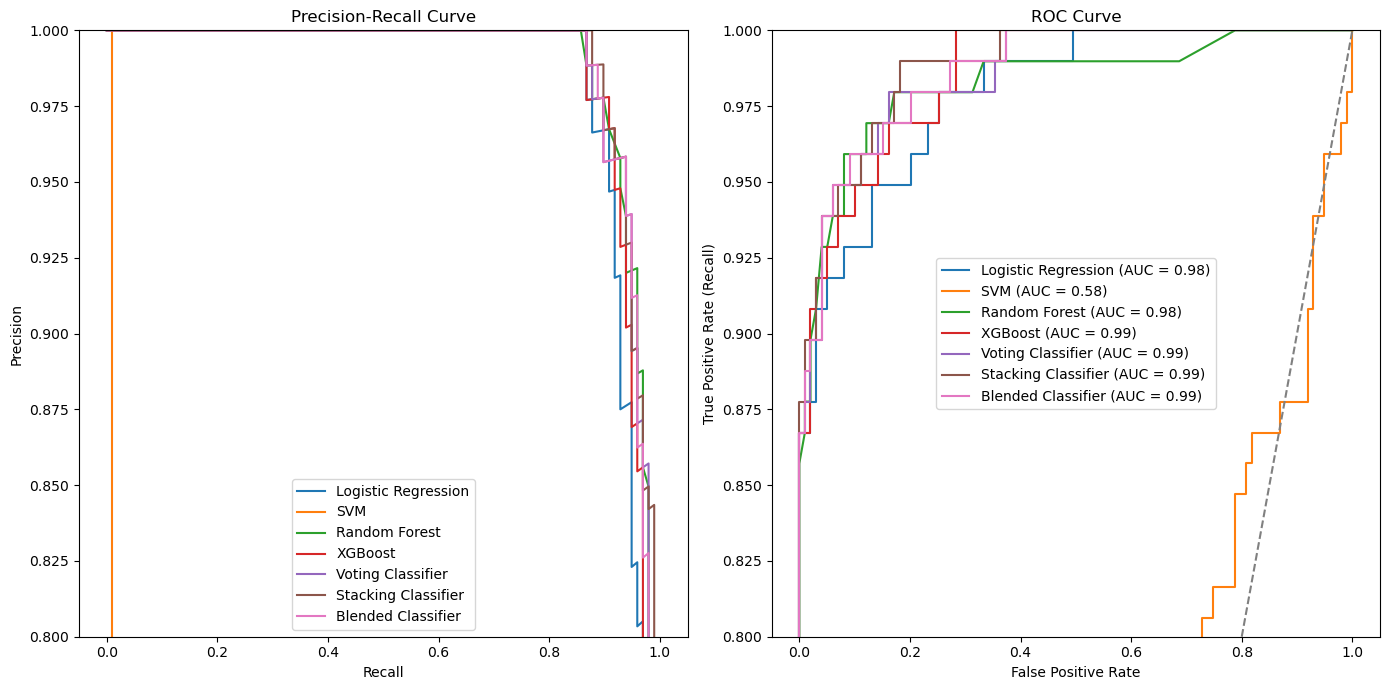

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models
log_reg = LogisticRegression()
svc = SVC(probability=True)
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()

# Train individual models
log_reg.fit(X_train, y_train)
svc.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Predict probabilities for individual models
log_reg_pred = log_reg.predict_proba(X_test)[:, 1]
svc_pred = svc.predict_proba(X_test)[:, 1]
rf_pred = random_forest.predict_proba(X_test)[:, 1]
xgb_pred = xgboost.predict_proba(X_test)[:, 1]

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg), 
    ('svc', svc), 
    ('rf', random_forest), 
    ('xgb', xgboost)], 
    voting='soft')
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict_proba(X_test)[:, 1]

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('lr', log_reg), 
    ('svc', svc), 
    ('rf', random_forest), 
    ('xgb', xgboost)], 
    final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
stacking_pred = stacking_clf.predict_proba(X_test)[:, 1]

# Blended probabilities (average of all models)
blended_pred = (log_reg_pred + svc_pred + rf_pred + xgb_pred + voting_pred + stacking_pred) / 6

# ----- Plot Precision-Recall Curves -----
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)  # Precision-Recall Curve

# Compute Precision-Recall Curve for each model
for model_name, y_pred in [('Logistic Regression', log_reg_pred),
                           ('SVM', svc_pred),
                           ('Random Forest', rf_pred),
                           ('XGBoost', xgb_pred),
                           ('Voting Classifier', voting_pred),
                           ('Stacking Classifier', stacking_pred),
                           ('Blended Classifier', blended_pred)]:
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, label=f'{model_name}')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.ylim([0.8, 1.0])

# ----- Plot ROC Curves -----
plt.subplot(1, 2, 2)  # ROC Curve

# Compute ROC Curve and AUC for each model
for model_name, y_pred in [('Logistic Regression', log_reg_pred),
                           ('SVM', svc_pred),
                           ('Random Forest', rf_pred),
                           ('XGBoost', xgb_pred),
                           ('Voting Classifier', voting_pred),
                           ('Stacking Classifier', stacking_pred),
                           ('Blended Classifier', blended_pred)]:
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random model
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='best')
plt.ylim([0.8, 1.0])

plt.tight_layout()
plt.show()


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


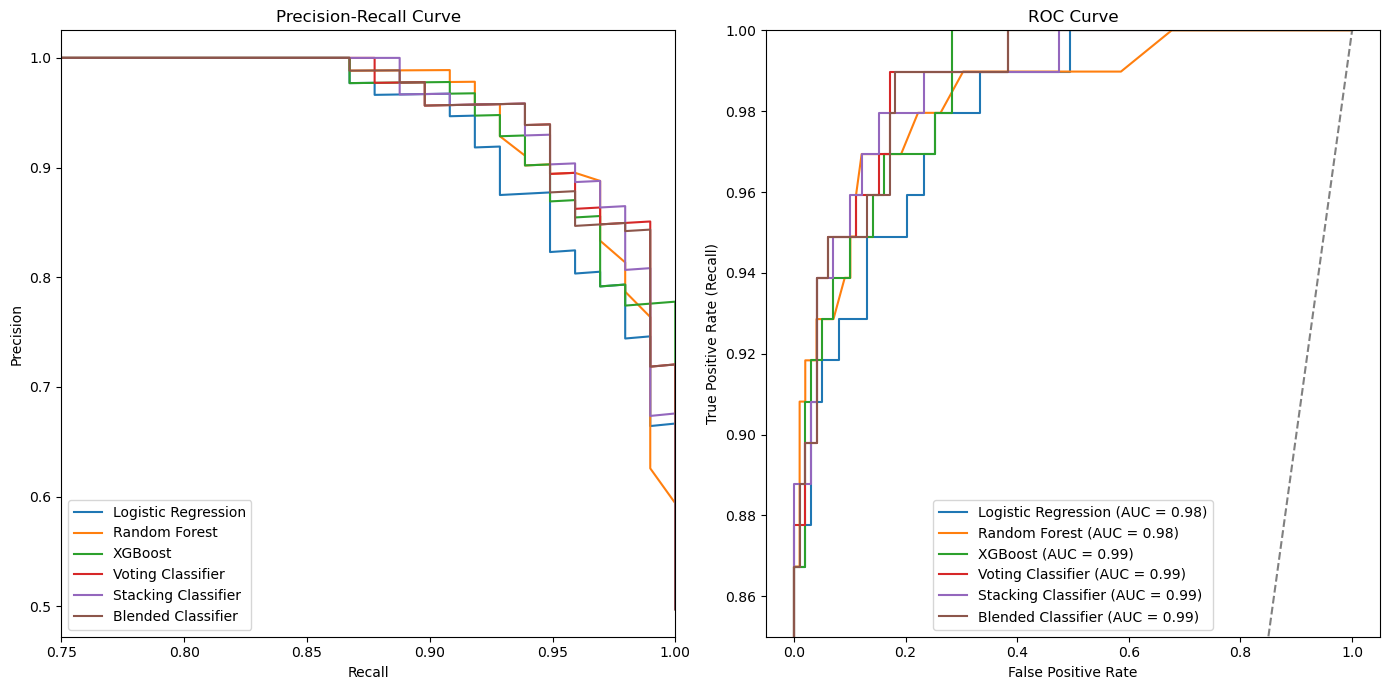

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models (without SVM)
log_reg = LogisticRegression()
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()

# Train individual models
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Predict probabilities for individual models
log_reg_pred = log_reg.predict_proba(X_test)[:, 1]
rf_pred = random_forest.predict_proba(X_test)[:, 1]
xgb_pred = xgboost.predict_proba(X_test)[:, 1]

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg), 
    ('rf', random_forest), 
    ('xgb', xgboost)], 
    voting='soft')
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict_proba(X_test)[:, 1]

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('lr', log_reg), 
    ('rf', random_forest), 
    ('xgb', xgboost)], 
    final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
stacking_pred = stacking_clf.predict_proba(X_test)[:, 1]

# Blended probabilities (average of remaining models)
blended_pred = (log_reg_pred + rf_pred + xgb_pred + voting_pred + stacking_pred) / 5

# ----- Plot Precision-Recall Curves -----
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)  # Precision-Recall Curve

# Compute Precision-Recall Curve for each model
for model_name, y_pred in [('Logistic Regression', log_reg_pred),
                           ('Random Forest', rf_pred),
                           ('XGBoost', xgb_pred),
                           ('Voting Classifier', voting_pred),
                           ('Stacking Classifier', stacking_pred),
                           ('Blended Classifier', blended_pred)]:
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, label=f'{model_name}')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.xlim([0.75,1])

# ----- Plot ROC Curves -----
plt.subplot(1, 2, 2)  # ROC Curve

# Compute ROC Curve and AUC for each model
for model_name, y_pred in [('Logistic Regression', log_reg_pred),
                           ('Random Forest', rf_pred),
                           ('XGBoost', xgb_pred),
                           ('Voting Classifier', voting_pred),
                           ('Stacking Classifier', stacking_pred),
                           ('Blended Classifier', blended_pred)]:
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random model
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='best')
plt.ylim([0.85, 1])

plt.tight_layout()
plt.show()


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


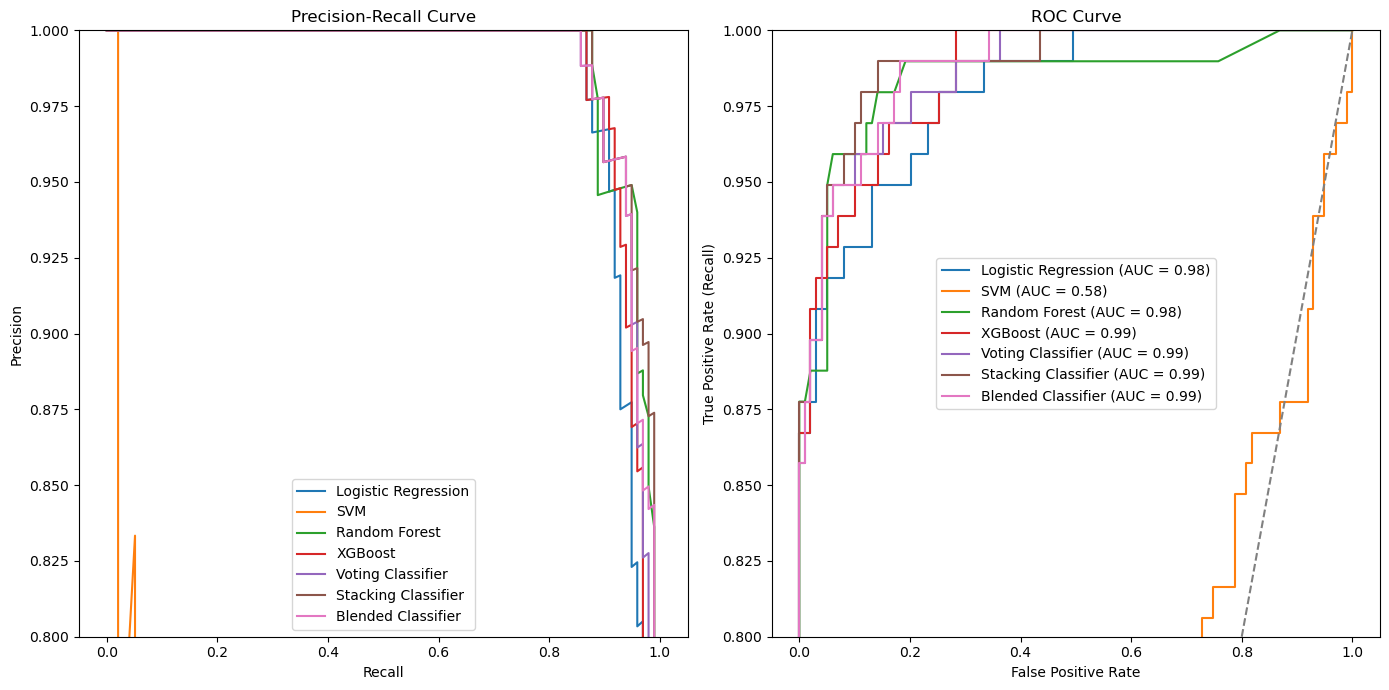

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models
log_reg = LogisticRegression()
svc = SVC()  # No probability=True here
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()

# Train individual models
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Calibrate the SVC model
calibrated_svc = CalibratedClassifierCV(svc, method='sigmoid')
calibrated_svc.fit(X_train, y_train)

# Predict probabilities for individual models
log_reg_pred = log_reg.predict_proba(X_test)[:, 1]
svc_pred = calibrated_svc.predict_proba(X_test)[:, 1]
rf_pred = random_forest.predict_proba(X_test)[:, 1]
xgb_pred = xgboost.predict_proba(X_test)[:, 1]

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg), 
    ('svc', calibrated_svc),  # Use the calibrated SVC
    ('rf', random_forest), 
    ('xgb', xgboost)], 
    voting='soft')
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict_proba(X_test)[:, 1]

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('lr', log_reg), 
    ('svc', calibrated_svc), 
    ('rf', random_forest), 
    ('xgb', xgboost)], 
    final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
stacking_pred = stacking_clf.predict_proba(X_test)[:, 1]

# Blended probabilities (average of all models)
blended_pred = (log_reg_pred + svc_pred + rf_pred + xgb_pred + voting_pred + stacking_pred) / 6

# ----- Plot Precision-Recall Curves -----
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)  # Precision-Recall Curve

# Compute Precision-Recall Curve for each model
for model_name, y_pred in [('Logistic Regression', log_reg_pred),
                           ('SVM', svc_pred),
                           ('Random Forest', rf_pred),
                           ('XGBoost', xgb_pred),
                           ('Voting Classifier', voting_pred),
                           ('Stacking Classifier', stacking_pred),
                           ('Blended Classifier', blended_pred)]:
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, label=f'{model_name}')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.ylim([0.8, 1.0])

# ----- Plot ROC Curves -----
plt.subplot(1, 2, 2)  # ROC Curve

# Compute ROC Curve and AUC for each model
for model_name, y_pred in [('Logistic Regression', log_reg_pred),
                           ('SVM', svc_pred),
                           ('Random Forest', rf_pred),
                           ('XGBoost', xgb_pred),
                           ('Voting Classifier', voting_pred),
                           ('Stacking Classifier', stacking_pred),
                           ('Blended Classifier', blended_pred)]:
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random model
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='best')
plt.ylim([0.8, 1.0])

plt.tight_layout()
plt.show()


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


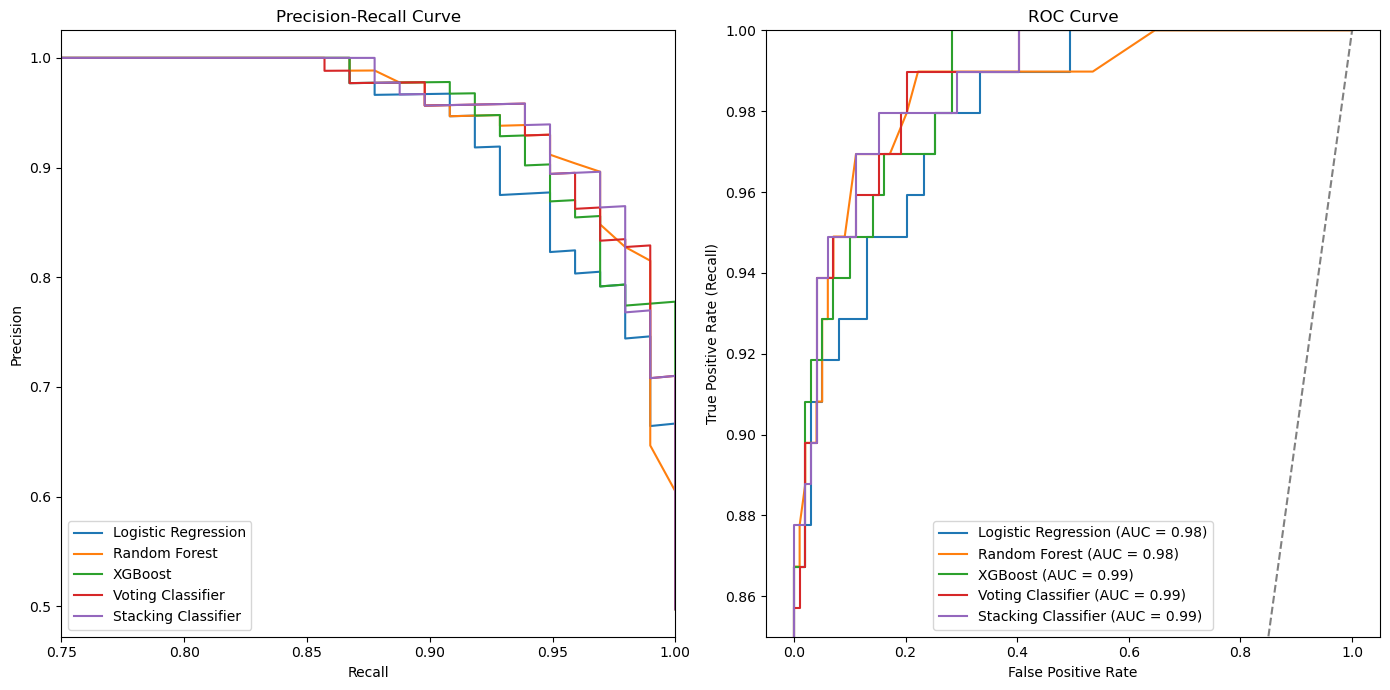

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models (without SVM)
log_reg = LogisticRegression()
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()

# Train individual models
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Predict probabilities for individual models
log_reg_pred = log_reg.predict_proba(X_test)[:, 1]
rf_pred = random_forest.predict_proba(X_test)[:, 1]
xgb_pred = xgboost.predict_proba(X_test)[:, 1]

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg), 
    ('rf', random_forest), 
    ('xgb', xgboost)], 
    voting='soft')
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict_proba(X_test)[:, 1]

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('lr', log_reg), 
    ('rf', random_forest), 
    ('xgb', xgboost)], 
    final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
stacking_pred = stacking_clf.predict_proba(X_test)[:, 1]

# ----- Plot Precision-Recall Curves -----
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)  # Precision-Recall Curve

# Compute Precision-Recall Curve for each model
for model_name, y_pred in [('Logistic Regression', log_reg_pred),
                           ('Random Forest', rf_pred),
                           ('XGBoost', xgb_pred),
                           ('Voting Classifier', voting_pred),
                           ('Stacking Classifier', stacking_pred)]:
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, label=f'{model_name}')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.xlim([0.75,1])

# ----- Plot ROC Curves -----
plt.subplot(1, 2, 2)  # ROC Curve

# Compute ROC Curve and AUC for each model
for model_name, y_pred in [('Logistic Regression', log_reg_pred),
                           ('Random Forest', rf_pred),
                           ('XGBoost', xgb_pred),
                           ('Voting Classifier', voting_pred),
                           ('Stacking Classifier', stacking_pred)]:
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random model
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='best')
plt.ylim([0.85, 1])

plt.tight_layout()
plt.show()


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


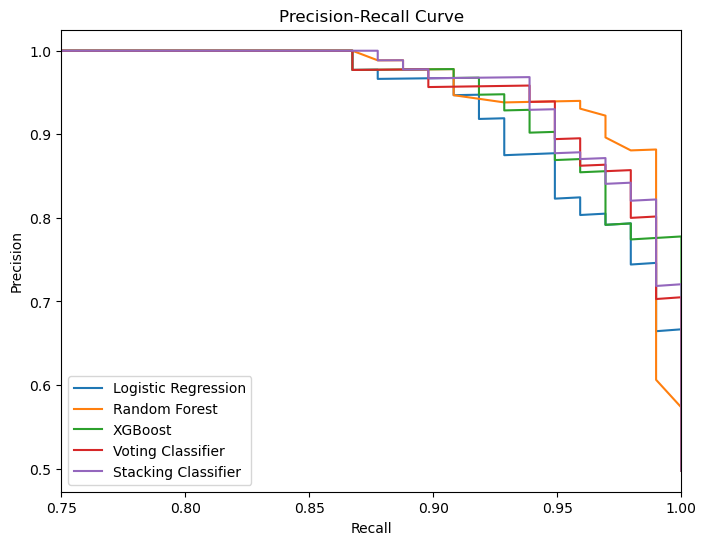

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models (without SVM)
log_reg = LogisticRegression()
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()

# Train individual models
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Predict probabilities for individual models
log_reg_pred = log_reg.predict_proba(X_test)[:, 1]
rf_pred = random_forest.predict_proba(X_test)[:, 1]
xgb_pred = xgboost.predict_proba(X_test)[:, 1]

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg), 
    ('rf', random_forest), 
    ('xgb', xgboost)], 
    voting='soft')
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict_proba(X_test)[:, 1]

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('lr', log_reg), 
    ('rf', random_forest), 
    ('xgb', xgboost)], 
    final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
stacking_pred = stacking_clf.predict_proba(X_test)[:, 1]

# ----- Plot Precision-Recall Curves -----
plt.figure(figsize=(8, 6))

# Compute Precision-Recall Curve for each model
for model_name, y_pred in [('Logistic Regression', log_reg_pred),
                           ('Random Forest', rf_pred),
                           ('XGBoost', xgb_pred),
                           ('Voting Classifier', voting_pred),
                           ('Stacking Classifier', stacking_pred)]:
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, label=f'{model_name}')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.xlim([0.75, 1])
plt.savefig('precision_recall_plot.png', dpi=300)
plt.show()


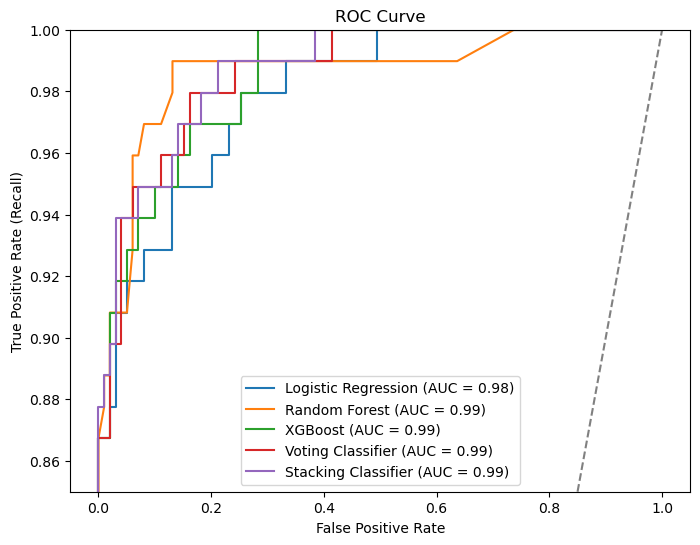

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ----- Plot ROC Curves -----
plt.figure(figsize=(8, 6))

# Compute ROC Curve and AUC for each model
for model_name, y_pred in [('Logistic Regression', log_reg_pred),
                           ('Random Forest', rf_pred),
                           ('XGBoost', xgb_pred),
                           ('Voting Classifier', voting_pred),
                           ('Stacking Classifier', stacking_pred)]:
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random model
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='best')
plt.ylim([0.85, 1])
plt.savefig('ROC_curve.png', dpi=300)
plt.show()
